# ${Introduction\;to\;scikit\;learn(sklearn)}$
---
This notebook demonstartes some of the most useful functions of the beautiful Scitki-Learn library.  
  
What we're going to cover:
  

In [232]:
first = [
    'Clean Data',
    'Transform Data',
    'Reduce Data'   
]

what_were_covering = [  
  "0. An end-to-end Scikit-Learn workflow",
  "1. Getting the data ready",
  "2. Choose the right estimator/algorithm for our problem",
  "3. Fit the model/algorithm and use it to make predictions on our data",
  "4. Evaluating a model",
  "5. Improve a model",
  "6. Save and load a trained model",
  "7. Putting it all together!"]

In [233]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML
%matplotlib inline

display(HTML("<style>.container { width:80% !important; }</style>"))
jtplot.style()

## An end-to-end Scikit_learn workflow

In [234]:
#1. Get the data ready
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [235]:
# Create X (features matrix) 
# target 是答案, 所以先drop掉
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [236]:
# Create y (labels)
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [237]:
# 2. Choose the right model and hyperparameters
# 基於 a.我們的問題是分類型, 要區分出有心臟並與無心臟並
# 以及 b.我們需要有hyperparameters 來對model進行調整
# 因此使用 RandomForestClassifier (有a、b 兩特性)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [238]:
# 3_1. Fit the model to the training data
# 將訓練用的資料與測試用的資料進行分隔
from sklearn.model_selection import train_test_split

# X = heart_disease.drop('target', axis=1) (input)
# y = heart_disease['target'] (output)
# 0.2 = 80% data will be userd for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [239]:
# X = features/input, y = label/output
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [240]:
# 3_2. make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [241]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [242]:
# 4. Evaluate the model on the training data and test data
# 對train data 作評估
clf.score(X_train, y_train)

1.0

In [243]:
clf.score(X_test, y_test)

0.8524590163934426

In [244]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [245]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [246]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [247]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set:{clf.score(X_test, y_test) * 100:.2f}%')

Trying model with 10 estimators...
Model accuracy on test set:85.25%
Trying model with 20 estimators...
Model accuracy on test set:80.33%
Trying model with 30 estimators...
Model accuracy on test set:83.61%
Trying model with 40 estimators...
Model accuracy on test set:80.33%
Trying model with 50 estimators...
Model accuracy on test set:86.89%
Trying model with 60 estimators...
Model accuracy on test set:83.61%
Trying model with 70 estimators...
Model accuracy on test set:83.61%
Trying model with 80 estimators...
Model accuracy on test set:83.61%
Trying model with 90 estimators...
Model accuracy on test set:81.97%


In [248]:
# RandomForestClassifier.score 與  accuracy_score 的差別再哪
# 1.data ready
# 2.split data > tran, test
# 3.fit(x_tran, y_tran) > clf
# 4.clf.predict(x_test) > y_predict
# 5.clf.score(x_test, y_test)

## 1. Getting our data ready to be used with machine learning
將data處理好已進入機器學習  

Three main things we have to do:
    1. Split the data into features and labels (usully `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [249]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [250]:
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [251]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [252]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [253]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

Clean Data  
移除不完整的資料列, 或填補平均值等等  
Transform Data  
將資料轉換為0、1  
Reduce Data  
過多的資料會造成資源（金錢、時間）的浪費所以縮減數據,也可以稱為降維或列縮減（減去不相關列）  




### 1.1 Make sure it's all numerical

In [254]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [255]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [256]:
# Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [257]:
# Build machine learning model
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [258]:

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 將非數字資料轉換為數字, 其中Doors較為特別, 雖然它已經是數字, 但是幾個車門可以作分類, 因此也加入分類
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(X)
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [259]:
# 因為汽車的價格無法從顏色、廠牌、車門數來做出準確預測所以分數很低, 
# 但本節重點在於如何將廢數據化的資料轉換為數字
# model.score(X_test, y_test)

### 1.2 What if where missing values)?
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether.


In [260]:
# Import car sales misssing data
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [261]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [262]:
# Create X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [263]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# categorical_features = ['Make', 'Colour', 'Doors']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
# transformed_x = transformer.fit_transform(X)
# pd.DataFrame(transformed_x)

### Option 1:Fill missing data with Pandas

In [264]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [265]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [266]:
# Remove row with missing Price value
# 因為 Price 是 label, 當 label缺失時, 將無法準確訓練model
car_sales_missing.dropna(inplace=True)



In [267]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [268]:
len(car_sales_missing)

950

In [269]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [270]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2:Fill missing values with Scikit-Learn

In [271]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [272]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [273]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)

# Split into X ＆ y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [274]:
# Fill missing values with Scilit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features), 
                             ('door_imputer', door_imputer, door_feature), 
                             ('num_imputer', num_imputer, num_features)])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [275]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [276]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [277]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

### Option 2: Filling missing data and transforming categorical data with Scikit-Learn
This notebook updates the code in the "Getting Your Data Ready: Handling Missing Values in Scikit-Learn".

The video shows filling and transforming the entire dataset (X) and although the techniques are correct, it's best to fill and transform training and test sets separately (as shown in the code below).

In [278]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [279]:
car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [280]:
# Check missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [281]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

Note the difference in the following cell to the videos, the data is split into train and test before any filling missing values or transformations take place.

In [282]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [283]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [284]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

Now we've filled our missing values, let's check how many are missing from each set.

In [285]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [286]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [287]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

Okay, no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding.

Again, keeping our training and test data separate.

In [288]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

### Fit a model
Wonderful! Now we've filled and transformed our data, ensuring the training and test sets have been kept separate. Let's fit a model to the training set and evaluate it on the test set.

In [289]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choose the right estimator/algorithm for our problem
根據要處理的問題選擇使用的機器學習模型
* estimator/algorithm = machine learning model in scikit-learn
* Classification - predicting whether a sample is on thing or another.
* Regression - predicting a number
* [scikit-learn ml map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### 2.1 Picking a mcachine learning model for a regression problem

In [290]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [291]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])

In [292]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [293]:
# How many data ?
len(boston_df)

506

In [294]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6662221670168519

How do we improve the score?  
What if Ridge wasn't working?  
Let's refer bsck to the map ... [see also](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [295]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Insstatiate Random forset Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.873969014117403

In [296]:
# Check the ridge model again
model.score(X_test, y_test)

0.6662221670168519

### 2.2 Choosing and estimator for a classification problem
Let's go to the map...[see also](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [297]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [298]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm and use it to make predictions on our data  


### 3.1 Fitting the model to the data

Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [299]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [300]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make predictions using a machine learning model

2 way to make predictions:
1. `predict()`
2. `predict_proba()`

In [301]:
# Use a trained model to make predictions

In [302]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [303]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [304]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [305]:
clf.score(X_test, y_test)

0.8524590163934426

In [306]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()


In [307]:
# predict_proba() returns probabilities of a calssification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [308]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models.

In [309]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [310]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [311]:
# y_test is Answer
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [312]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
from typing import List

#平均絕對誤差 mean absolute error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

### 4. Evaluating a machine learning modle

Three ways to evaluate Scikit-Learn models/esitmators:  
評估機器學習模型
1. Estimator `score` method 
2. The `scoring` parameter
3. Problem-specific metric functions.  

### 4.1 Evaluation a model with the score method

In [313]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [314]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regreesion...

In [315]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [316]:
model.score(X_test, y_test)

0.873969014117403

### 4.2 Evaluating a model using the `scoring` parameter

In [317]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [318]:
# clf = train model
# X = feature
# y = label
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [319]:
np.random.seed(42)
# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [320]:
# Scoring parameter set to None by default
# 當cross_val_score參數位給scoring時, 預設為None,
# 而 scoring = None (預設), 則會帶入 scoring = clf.score()
# 此處的 clf 是 RandomForestClassifier, 所以預設scoring 是 mean accuracy
# Default scoring parameter of classifier = mean accuracy
# clf.score() = mean accuracy

cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area umder ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [321]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [322]:
np.mean(cross_val_score)

0.8248087431693989

In [323]:
print(f'Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy:82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve
* [see also](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1 
* False positive = model predicts 1 when truth is 0  
* True negative = model predicts 0 when truth is 0
* Flase negative = model predicts 0 when true is 1

In [324]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [325]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [326]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [327]:
# Caculate fpr, tpr and thresholds
# fpr = FP / (FP + TN) 在所有實際陰性樣本中被誤判為陽性的比率, T = 猜對, P = 實際是陽性
# tpr = TP / (TP + FN) 在所有實際陽性樣本中正確判定陽性的比率, F = 猜錯, P = 實際是陽性
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

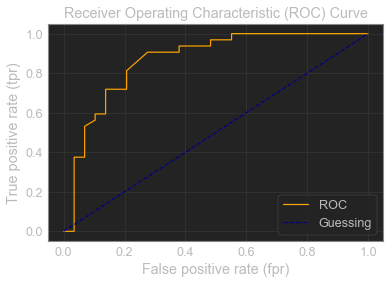

In [328]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # Plot roc 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot line with no predictive power (baseline) 繪製一條沒有進行預測的基準線來比較
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)




In [329]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

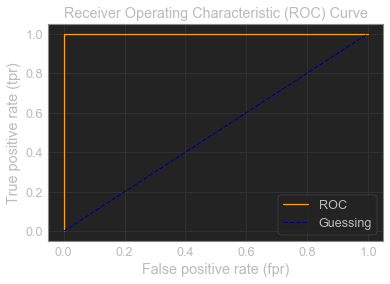

In [330]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [331]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**  
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.  
混淆矩陣是比較模型預測的標籤和模型應預測的實際標籤的快速方法。
  
In essence, giving you an idea of where the model is getting confused.  
從本質上講，讓您了解模型的混亂之處

In [332]:
from sklearn.metrics import confusion_matrix

# y_test = test sets 的 label
# y_preds = 使用 X_test 進行預測得到的 y_preds
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [333]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [334]:
# install seaborn
# How install a conda package into the current envrionment from a Jupyter Notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

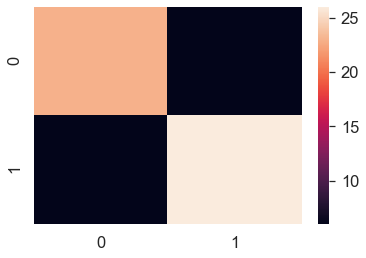

In [335]:
# Make our confusion matrix more visual with Seaborn's heatmp()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion martix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

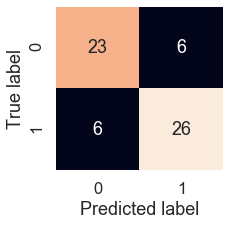

In [336]:
def plot_conf_mat(conf_mat):
    '''
    Plots a confusion matrix ustin Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

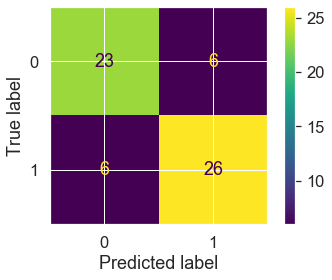

In [337]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test);

**Classification report**

In [338]:
from sklearn.metrics import classification_report

# y_test = test sets 的 label
# y_preds = 使用 X_test 進行預測得到的 y_preds
# 將y_test 與 y_preds進行比較
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



1:41 記得重看
Precision = TP/ (TP + FP)   
Recall = TP/(TP + FN)  
F1-score = 2* (P*R)/(P+R)  
Suppot = 樣本數  
Accuracy   
Macro avg  
Weighter abg   

In [339]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

g:\Work\ProjectHub\Conda\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
 * **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).  
 ##### 如果類別間的樣本數均達到平衡（例如，標有0或1的相同數量的樣本）可以安心使用
 * **Precision** and **recall** become more important when classes are imbalanced.
 ##### 如果類別間的樣本書不平衡時, 精確度與召回率變得更加重要
 * if false positive predictions are worse than false negatives, aim for higher precision.  
 ##### 如果FP比FN差, 提高精確度的加權
 * if false negative predictions are worse than false positives, aim for higher recall.  
 ##### 如果FN比FP差, 提高召回率的加權
 * **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - [see also](https://scikit-learn.org/stable/modules/model_evaluation.html) [cn](https://sklearn.apachecn.org/docs/master/32.html)

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean suqared error (MSE)
4. perfectly is max(R^2) & min(MAE) & min(MSE)  
  
**R^2**  
What R-squared does: Compares your model predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. Forexample, if all your model does is predict the mean of the targets, it's R^2 value woule be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

##### R平方的作用：
#### 將模型預測與目標均值進行比較。值的範圍可以從負無窮大（非常差的模型）到1。 
##### 例如，如果您的所有模型所做的都是預測目標的均值，則R ^ 2值將為0。
##### 並且，如果您的模型完美地預測了數字範圍，則為R ^ 2的值為1。

描述出數值怎樣算好?
接近0與接近１代表甚麼意思？

In [341]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [343]:
# default R^2
model.score(X_test, y_test)

0.873969014117403

In [346]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [350]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test, y_test_mean)

(0.0, 1.0)

In [ ]:
# Model predicting perfectly the correct values gets an R^2 scroe of 1
r2_score(y_test, y_test)

**Mean absolue error(MAE)**  
MAE is the average of the aboslute differences between predictions and actual values.  
##### MAE 為預測值與實際值的差異絕對值的平均,
It gives you an idea of how wrong your models predictions are.
##### 可以用來了解model 預測的錯誤程度  

In [357]:
# Mean absolute error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
df = pd.DataFrame(data={'actual values': y_test,
                       'predicted values': y_preds})
df['differences'] = abs(df['predicted values'] - df['actual values'])
df

,actual values,predicted values,differences
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,4.870
436,9.6,12.490,2.890
411,17.2,13.406,3.794
86,22.5,20.219,2.281


**Mean Squared error (MSE)**

In [360]:
# Mean Squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [361]:
squared = np.square(df['differences'])
squared.mean()

9.242328990196082

### 4.2.3 Finally using the `scoring` parameter

In [363]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
clf = RandomForestClassifier()

In [375]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring=None)
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc) * 100 :.2f}%')

The cross-validated accuracy is: 82.48%


In [374]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring='accuracy')
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc) * 100 :.2f}%')

The cross-validated accuracy is: 82.48%


In [377]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, scoring='precision')
np.mean(cv_precision)

0.8329547346025924

In [379]:
# Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall')
np.mean(cv_recall)

0.8424242424242424

In [380]:
# F1
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
np.mean(cv_f1)

0.841476533416832

How about out regression model?

In [393]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = boston_df.drop('target', axis=1)
y = boston_df['target']
model = RandomForestRegressor()

In [390]:
# R^2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [391]:
# R^2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
np.mean(cv_r2)

0.622375083951403

In [404]:
# Mean absolute error (MAE)
# 遵循一貫作風高分比低分好, 所以MAE與MSE等都改為return negtive score
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-3.0314302853814783

In [405]:
# Mean squared error (MSE)
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-21.283214366686064

### 4.3 Using different evaluation metrics as Scikit-Learn functions  
**Classification evaluation functions**


In [414]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds) * 100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds) * 100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds) * 100:.2f}%')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression evaluation functions**

In [421]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = boston_df.drop('target', axis=1)
y = boston_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model

print('Regression metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds) * 100:.2f}%')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R^2: 87.40%
MAE: 2.1226372549019623
MSE: 9.242328990196082


## 5. Improving a model
由於做了初次預測後, 會開始對預測結果進行優化,
所以初次預測的成果也會是基準.

First predictions = baseline prediction.  
First model = baseline model.  

From a data perspective:
* Could we collect more data ? (generally, the more, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find theese patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve it's ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [423]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}